Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:<br><br>The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers<br><br>ID --Unique ID<br><br>Balance--Number of miles eligible for award travel<br><br>Qual_mile--Number of miles counted as qualifying for Topflight status<br><br>cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:<br>cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:<br>cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:<br><br>1 = under 5,000<br>2 = 5,000 - 10,000<br>3 = 10,001 - 25,000<br>4 = 25,001 - 50,000<br>5 = over 50,000<br><br>Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months<br><br>Bonus_trans--Number of non-flight bonus transactions in the past 12 months<br><br>Flight_miles_12mo--Number of flight miles in the past 12 months<br><br>Flight_trans_12--Number of flight transactions in the past 12 months<br><br>Days_since_enrolled--Number of days since enrolled in flier program<br><br>Award--whether that person had award flight (free flight) or not


 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
airlines_data = pd.read_excel("EastWestAirlines.xlsx")
airlines_data.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
print(airlines_data.isnull().any().any())

False


In [4]:
airlines_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
# Renaming columns
airlines_data = airlines_data.rename({'ID#':'ID','Award?':'Award'}, axis = 1)
airlines_data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:

# Checking for all the values in dataset of type integer, if not replacing them with nan
def check_int(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [8]:
check_int(airlines_data[airlines_data.columns])

In [9]:
airlines_data.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [10]:
airlines_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


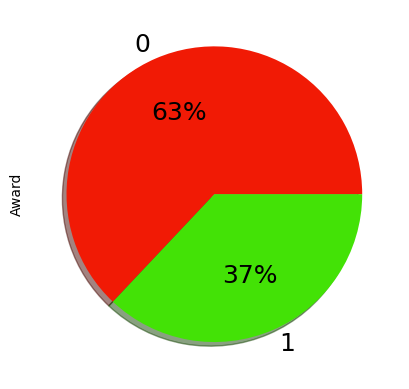

In [11]:
# Checking previously awarded miles ratio
airlines_data['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

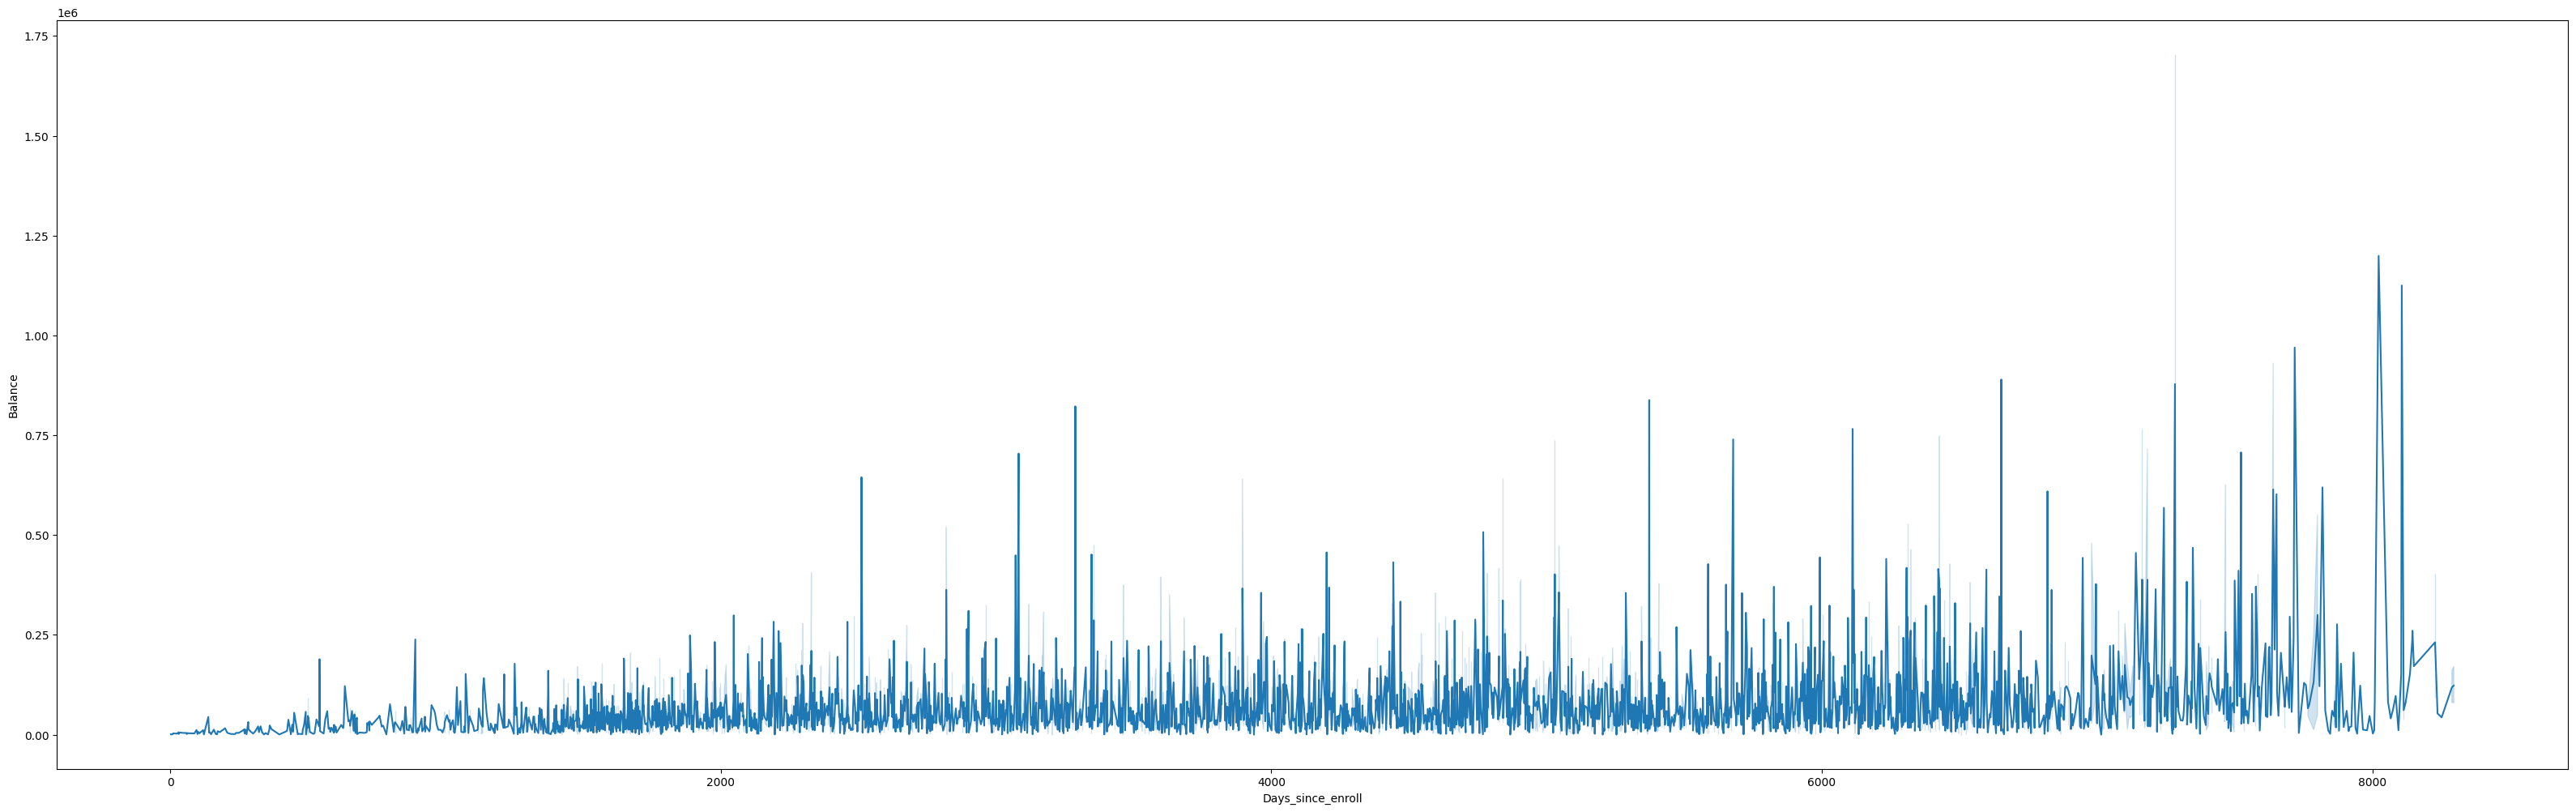

In [12]:
# Checking relation between Balance and Days_since_enroll
import seaborn as sns
fig, ax =plt.subplots(figsize=(40,12))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = airlines_data)

#### Agglomerative clustering

In [13]:
data = airlines_data.drop('ID', axis = 1)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [15]:

# We will check clustering for two different scaling functions
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [16]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.862

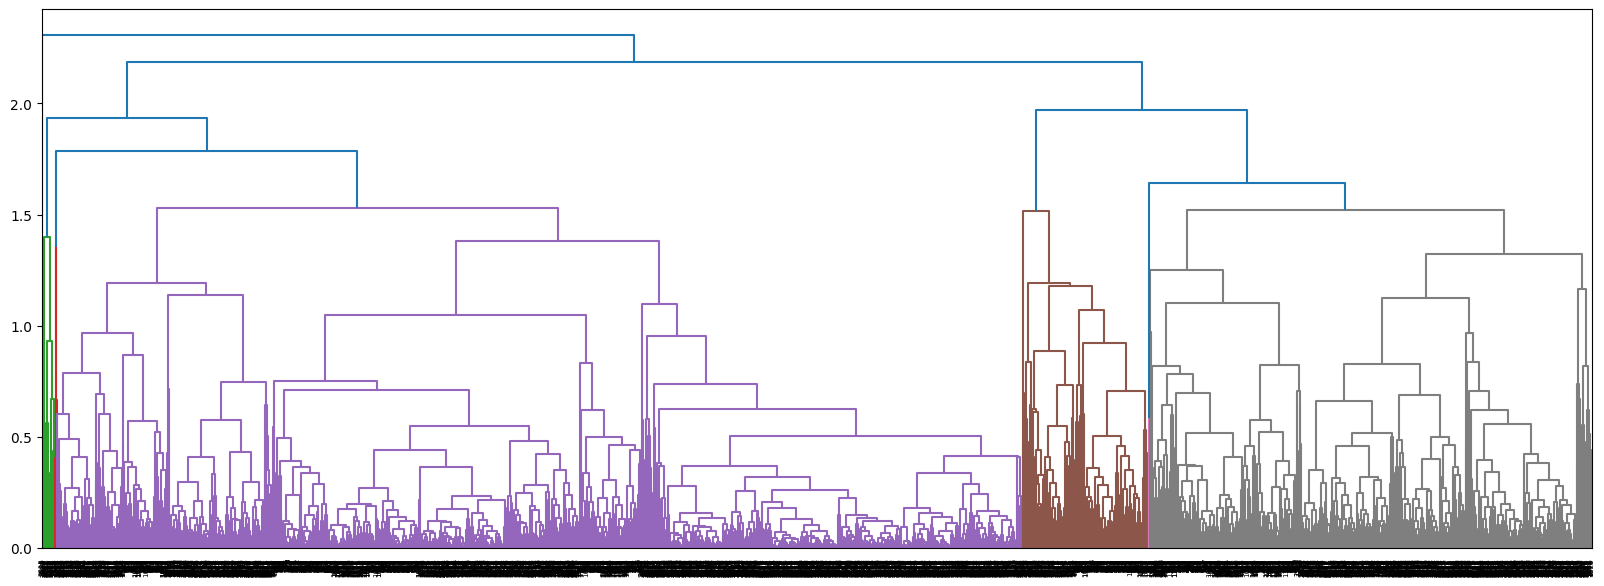

In [17]:
# Create Dendrograms
plt.figure(figsize=(20, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler1_df,'complete'))

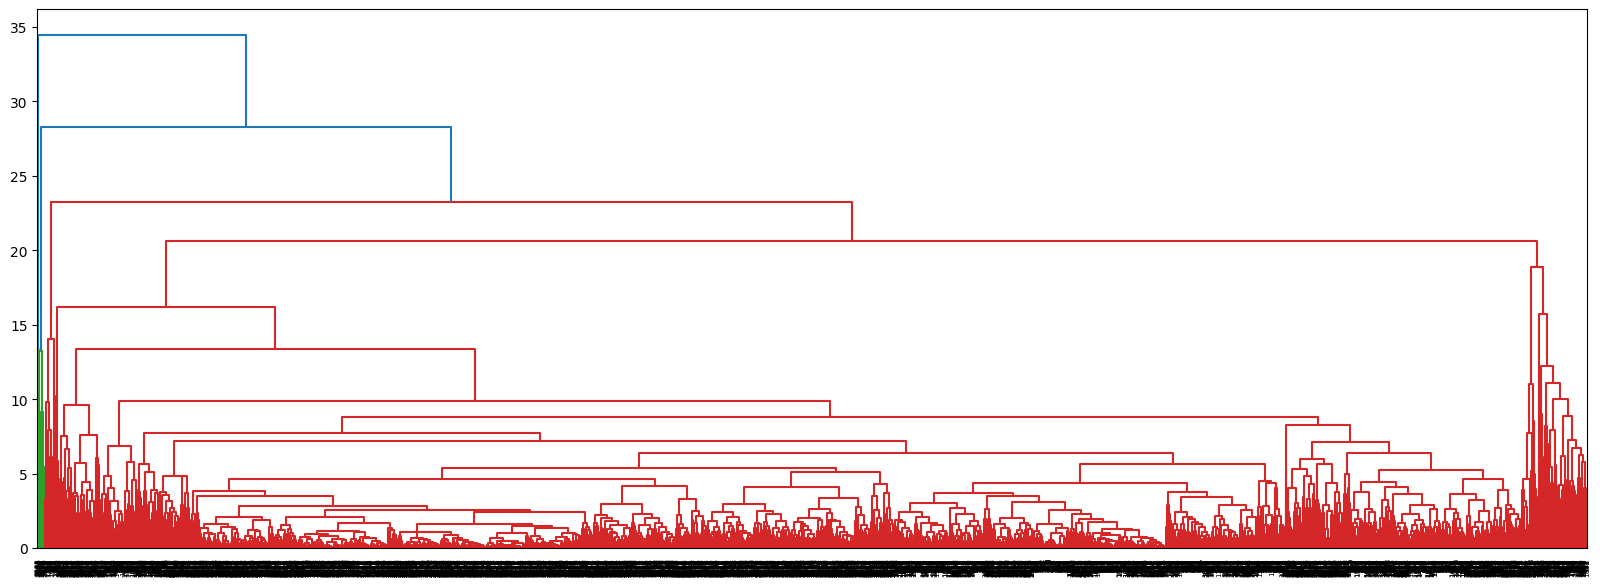

In [18]:
plt.figure(figsize=(20, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler2_df,'complete'))

In [20]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=5,linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=5)

In [21]:
# Using data normalized by MinMaxScaler 
y=pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [22]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. minmaxscaler
airlines_data['clustersid_s1']=H_clusters.labels_
airlines_data.head()



,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [23]:
data['clustersid_s1']=H_clusters.labels_
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


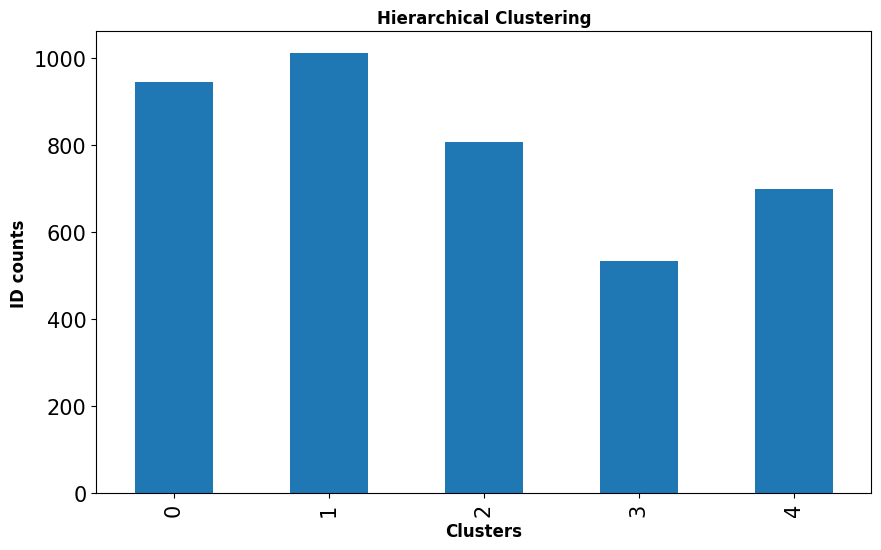

In [24]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
airlines_data.groupby(['clustersid_s1']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [25]:

data.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


In [26]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score
sil_score= silhouette_score(scaler1_df, H_clusters.labels_)
sil_score

0.3762586351398372

In [27]:
# Using data normalized by StandardScaler
y=pd.DataFrame(H_clusters.fit_predict(scaler2_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    2446
0    1362
2     130
3      43
4      18
Name: clustersid, dtype: int64

In [28]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. StandardScaler
airlines_data['clustersid_s2']=H_clusters.labels_
data['clustersid_s2']=H_clusters.labels_

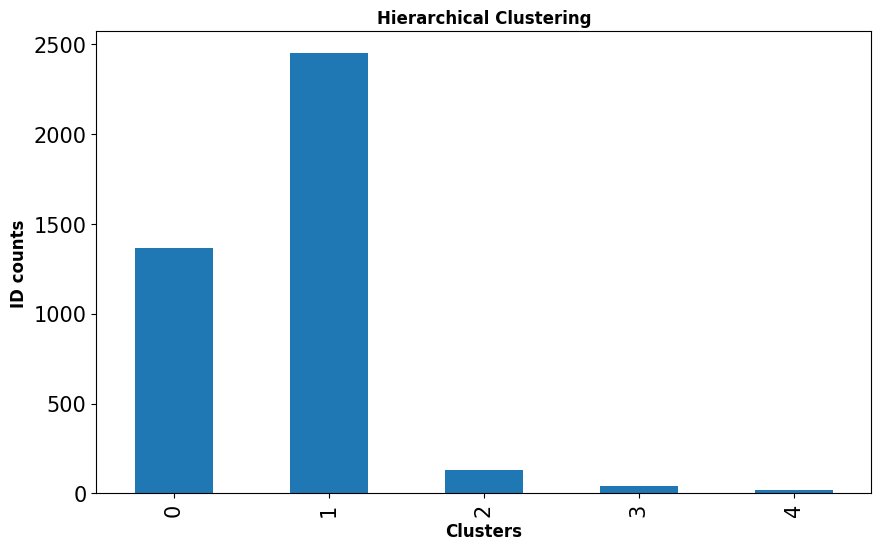

In [29]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
airlines_data.groupby(['clustersid_s2']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [30]:
data.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0,0.627907
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0,1.044510
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0,0.507426
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0,0.261682
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,1.011445


In [31]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

sil_score= silhouette_score(scaler2_df, H_clusters.labels_)
sil_score

0.3098805307874414

#### K means clustering

In [32]:
# Import Library
from sklearn.cluster import KMeans


In [33]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [34]:

# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.25       0.25      ]
 [0.01128788 0.         0.         ... 0.         0.25       0.25      ]
 [0.02425685 0.         0.         ... 0.         0.25       0.25      ]
 ...
 [0.0431695  0.         0.5        ... 1.         0.         0.        ]
 [0.03220189 0.         0.         ... 0.         1.         0.25      ]
 [0.00176908 0.         0.         ... 0.         1.         0.25      ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ...  1.30391816e+00
  -1.25111675e+00 -1.17607423e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
   1.59647340e+00  4.41786398e-01]
 [-7.00507951e-01 -1.862

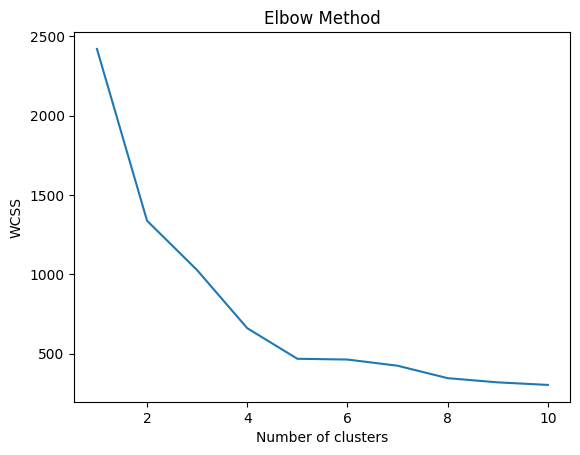

In [35]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

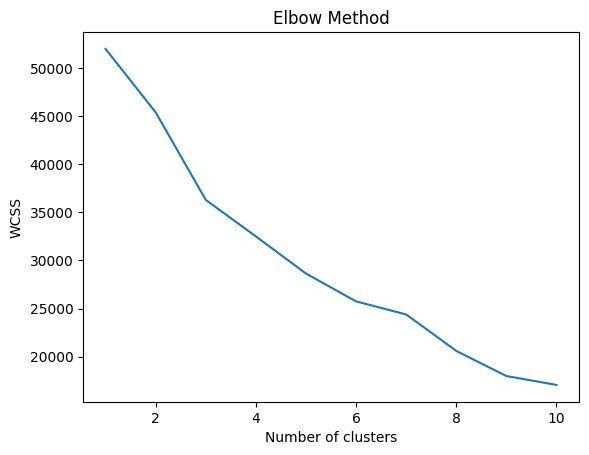

In [36]:
# Using data normalized by StandardScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler2_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### From above two Scree plots, optimum number of clusters can be selected equal to 5

In [37]:
#Build Cluster algorithm


# Using data normalized by MinMaxScaler
clusters_new1 = KMeans(5, random_state=42)
clusters_new1.fit(scaler1_df)

sil_score= silhouette_score(scaler1_df, clusters_new1.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

# Using data normalized by StandardScaler
clusters_new2 = KMeans(5, random_state=42)
clusters_new2.fit(scaler2_df)

sil_score= silhouette_score(scaler2_df, clusters_new2.labels_)
print('Silhouette Score for data normalized by StandardScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.46196050142852263
Silhouette Score for data normalized by StandardScaler:  0.2761506235118417


We can see that Silhouette Score for data normalized by MinMaxScaler is greater than data normalized by StandardScaler, so we will consider data normalized by MinMaxScaler for further computation

In [38]:
#Assign clusters to the data set
airlines_data['clusterid_Kmeans'] = clusters_new1.labels_
data['clusterid_Kmeans'] = clusters_new1.labels_

In [39]:
y=pd.DataFrame(clusters_new1.fit_predict(scaler1_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

3    1818
1     700
0     608
2     532
4     341
Name: clusterid_Kmeans, dtype: int64

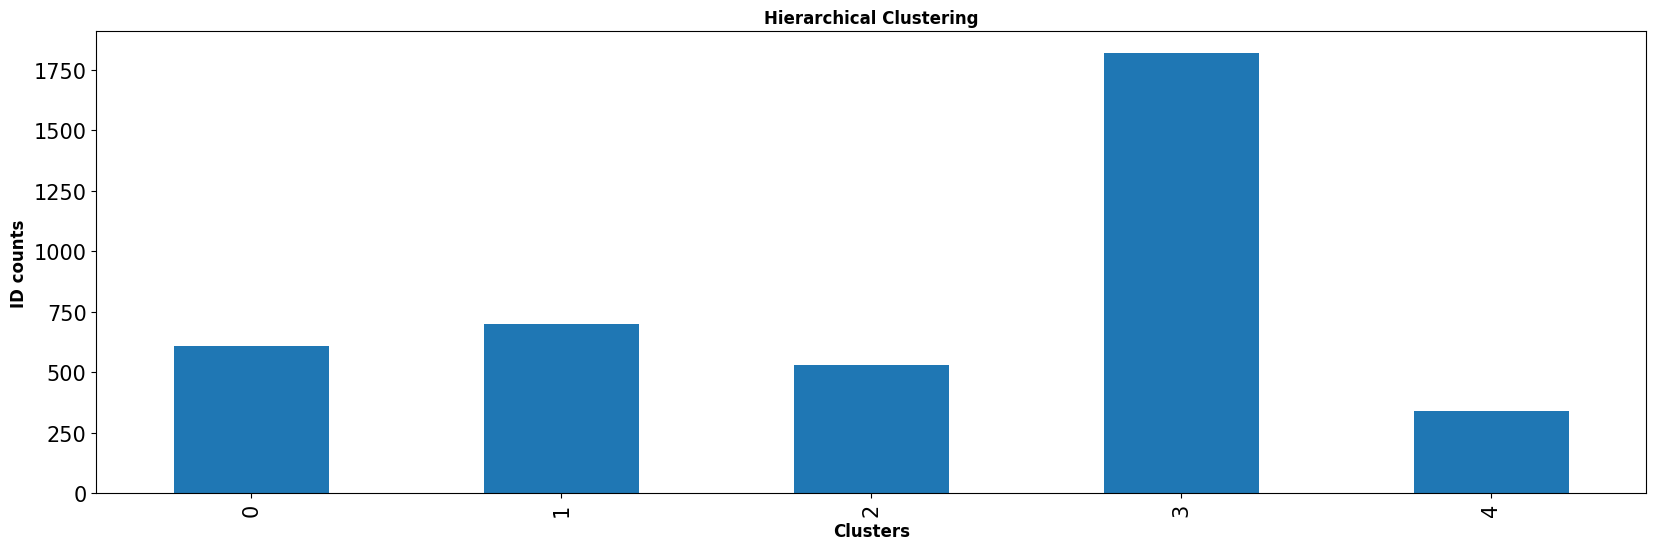

In [40]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(20, 6))
airlines_data.groupby(['clusterid_Kmeans']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [41]:
data.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,85718.856908,303.480263,1.067434,1.037829,1.003289,8212.774671,9.875000,1116.105263,3.412829,4418.677632,1.0,0.014803,0.986842
1,1,30090.751429,97.914286,1.000000,1.000000,1.005714,2669.134286,6.102857,339.788571,0.947143,1568.128571,0.0,3.997143,1.015714
2,2,127171.740602,158.546992,4.381579,1.000000,1.046992,58711.048872,22.041353,910.251880,2.806391,5081.312030,1.0,3.000000,0.248120
3,3,71250.062706,83.632013,1.976898,1.019252,1.009901,13138.023652,10.313531,182.591859,0.539054,4687.960396,0.0,1.443894,0.804180
4,4,70273.131965,254.744868,2.821114,1.000000,1.000000,19299.923754,16.551320,314.114370,0.826979,4281.240469,1.0,0.000000,0.005865


#### DBSCAN

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
# Normalizing data using MinMaxScaler
scaler1_df = scaler1.fit_transform(data)
print(scaler1_df)

[[0.01650773 0.         0.         ... 0.25       0.25       0.75      ]
 [0.01128788 0.         0.         ... 0.25       0.25       0.75      ]
 [0.02425685 0.         0.         ... 0.25       0.25       0.75      ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.         1.        ]
 [0.03220189 0.         0.         ... 1.         0.25       0.25      ]
 [0.00176908 0.         0.         ... 1.         0.25       0.25      ]]


#### Trying different values of eps and mn_samples

In [44]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler1_df)

DBSCAN(eps=1, min_samples=12)

In [45]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])

y['clusterid_DBSCAN'].value_counts()


 0    2518
 1    1479
-1       2
Name: clusterid_DBSCAN, dtype: int64

In [47]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan.labels_)
sil_score

0.4288489017727068

In [48]:
airlines_data["clusterid_DBSCAN"] = y["clusterid_DBSCAN"]

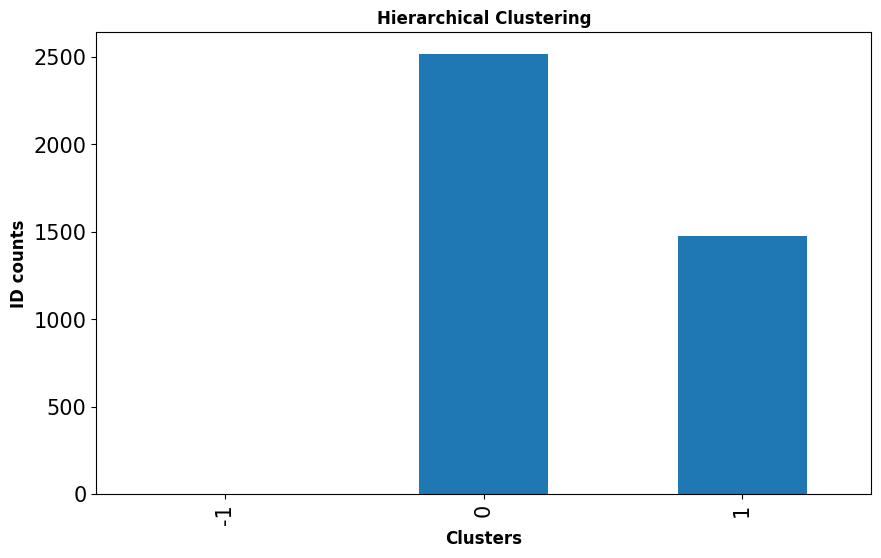

In [49]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
airlines_data.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

#### As more than 50% of data is in one cluster, we will try for lower value of epsilon

In [50]:
# for epsilon = 0.8
dbscan1 = DBSCAN(eps=0.8, min_samples=12)
dbscan1.fit(scaler1_df)

y=pd.DataFrame(dbscan1.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan1.labels_)
print('silhouette score: ',sil_score)

 0    2514
 2     605
 1     531
 3     341
-1       8
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.5070972865940327


In [51]:

eps = [0.5,0.55, 0.6,0.7,0.8, 0.9]
for epsilon in eps:
    
    dbscan2 = DBSCAN(eps=epsilon, min_samples=12)
    dbscan2.fit(scaler1_df)

    y=pd.DataFrame(dbscan2.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
    print("with epsilon value : ", epsilon, ":\n", y['clusterid_DBSCAN'].value_counts())

    # silhouette score
    sil_score= silhouette_score(scaler1_df, dbscan2.labels_)
    print("with epsilon value : ", epsilon, ":", 'silhouette score: ',sil_score)
    print("#########################################################################\n")

with epsilon value :  0.5 :
  0    1781
 6     699
 2     585
 1     474
 3     339
-1      57
 4      48
 5      16
Name: clusterid_DBSCAN, dtype: int64
with epsilon value :  0.5 : silhouette score:  0.529360167213774
#########################################################################

with epsilon value :  0.55 :
  0    1784
 5     699
 2     586
 1     523
 3     340
-1      30
 4      25
 6      12
Name: clusterid_DBSCAN, dtype: int64
with epsilon value :  0.55 : silhouette score:  0.5552769904238838
#########################################################################

with epsilon value :  0.6 :
  0    1809
 4     699
 2     602
 1     523
 3     340
-1      26
Name: clusterid_DBSCAN, dtype: int64
with epsilon value :  0.6 : silhouette score:  0.5766643822360924
#########################################################################

with epsilon value :  0.7 :
  0    1812
 4     699
 2     604
 1     525
 3     341
-1      18
Name: clusterid_DBSCAN, dtype: int64
with

When we have value of epsilon = 0.6, we are getting 5 clusters with data less than 50% in one cluster and also, silhouette score is more as compared to other dbscan models.

In [52]:
# for epsilon = 0.6
dbscan4 = DBSCAN(eps=0.6, min_samples=12)
dbscan4.fit(scaler1_df)

y=pd.DataFrame(dbscan4.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan4.labels_)
print('silhouette score: ',sil_score)

 0    1809
 4     699
 2     602
 1     523
 3     340
-1      26
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.5766643822360924


In [53]:
airlines_data['clusterid_DBSCAN'] = dbscan4.labels_
data['clusterid_DBSCAN'] = dbscan4.labels_

In [54]:
airlines_data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_Kmeans,clusterid_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0,2,1


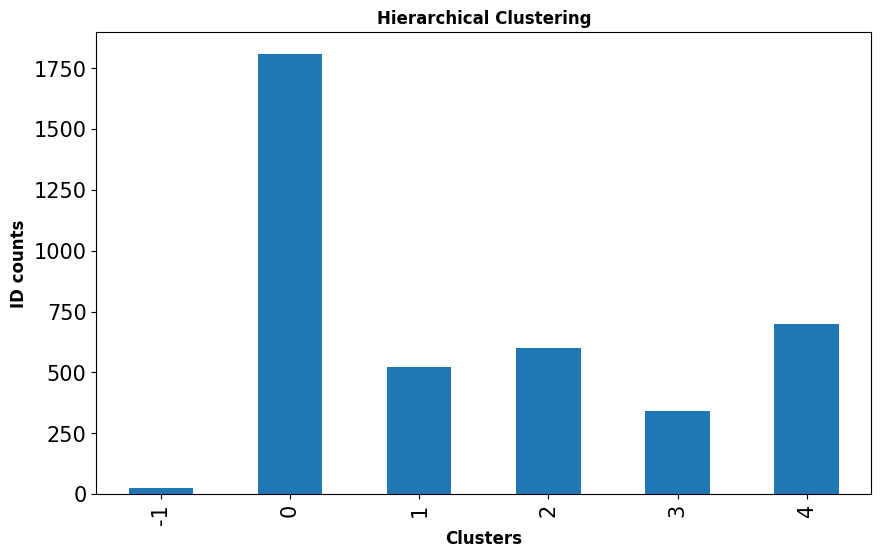

In [55]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
airlines_data.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [56]:
data.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,201066.000000,457.500000,3.115385,1.076923,2.884615,78067.615385,30.692308,3216.730769,8.307692,4340.153846,0.615385,2.115385,3.230769,1.923077
1,0,70700.342731,84.048093,1.970702,1.018795,1.000000,12917.706468,10.245992,181.952460,0.537313,4689.611388,0.000000,1.441680,0.788834,3.000000
2,1,128144.883365,159.577438,4.384321,1.000000,1.000000,57731.363289,21.841300,878.879541,2.755258,5092.133843,1.000000,3.000000,0.187380,2.000000
3,2,82087.862126,303.710963,1.064784,1.036545,1.000000,7685.564784,9.558140,1035.393688,3.192691,4418.583056,1.000000,0.000000,0.978405,0.000000
4,3,69973.611765,228.067647,2.814706,1.000000,1.000000,19293.800000,16.532353,312.244118,0.820588,4276.350000,1.000000,0.000000,0.005882,4.000000
5,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.000000,4.000000,1.011445,1.000000
